# Data Analysis on Kickstarter Projects

Data from Kaggle: [Kickstarter Campaigns dataset](https://www.kaggle.com/datasets/sripaadsrinivasan/kickstarter-campaigns-dataset)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import entropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

#Configuing pandas options so output cells aren't truncated
pd.options.display.max_seq_items = 5000
pd.options.display.max_rows = 5000

## Loading Data


In [ ]:
!curl -O https://raw.githubusercontent.com/rromer07/kickstarter-status-prediction/main/kickstarter_data_full.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 94.8M  100 94.8M    0     0  53.5M      0  0:00:01  0:00:01 --:--:-- 53.5M


In [ ]:
!curl -O https://raw.githubusercontent.com/rromer07/kickstarter-status-prediction/main/kickstarter_data_sampled_final.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9812k  100 9812k    0     0  16.1M      0 --:--:-- --:--:-- --:--:-- 16.1M


In [ ]:
df = pd.read_csv("./kickstarter_data_full.csv", index_col=[0], encoding= 'unicode_escape')

<ipython-input-4-171f9a9dfe4c>:1: DtypeWarning: Columns (5,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./kickstarter_data_full.csv", index_col=[0], encoding= 'unicode_escape')


## Data Exploration

In [ ]:
# df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20632 entries, 0 to 20631
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           20632 non-null  int64  
 1   photo                        20632 non-null  object 
 2   name                         20632 non-null  object 
 3   blurb                        20627 non-null  object 
 4   additional_blurb             149 non-null    object 
 5   goal                         20632 non-null  float64
 6   pledged                      20632 non-null  float64
 7   state                        20632 non-null  object 
 8   slug                         20632 non-null  object 
 9   disable_communication        20632 non-null  bool   
 10  country                      20632 non-null  object 
 11  currency                     20632 non-null  object 
 12  currency_symbol              20632 non-null  object 
 13  currency_trailin

In [ ]:
df.shape

(20632, 68)

In [ ]:
df.isna().sum()

id                                 0
photo                              0
name                               0
blurb                              5
additional_blurb               20483
goal                               0
pledged                            0
state                              0
slug                               0
disable_communication              0
country                            0
currency                           0
currency_symbol                    0
currency_trailing_code             0
deadline                           0
state_changed_at                   0
created_at                         0
launched_at                        0
staff_pick                         0
backers_count                      0
static_usd_rate                    0
usd_pledged                        0
creator                            0
location                          45
category                        1889
profile                            0
spotlight                          0
u

Dropping null values & other unnecessary columns

In [ ]:
cols = ['id','is_starred', 'is_backing', 'permissions', 'friends', 'photo', 'state', 
        'currency','currency_symbol','currency_trailing_code', 'static_usd_rate'
        ,'creator', 'location','profile', 'spotlight', 'source_url', 
        'name_len', 'name_len_clean', 'blurb_len', 'blurb_len_clean', 
        'usd_pledged', 'pledged', 'additional_blurb','deadline_yr', 
        'state_changed_at_yr', 'created_at_yr', 'launched_at_yr']

In [ ]:
df = df.drop(columns=cols)

Check again for null values

In [ ]:
df.isna().sum()

name                              0
blurb                             5
goal                              0
slug                              0
disable_communication             0
country                           0
deadline                          0
state_changed_at                  0
created_at                        0
launched_at                       0
staff_pick                        0
backers_count                     0
category                       1889
urls                              0
deadline_weekday                  0
state_changed_at_weekday          0
created_at_weekday                0
launched_at_weekday               0
deadline_month                    0
deadline_day                      0
deadline_hr                       0
state_changed_at_month            0
state_changed_at_day              0
state_changed_at_hr               0
created_at_month                  0
created_at_day                    0
created_at_hr                     0
launched_at_month           

Let's see how much data we have left after dropping null values.

In [ ]:
df.shape

(20632, 41)

Ok, great we still have a good amount of data left after dropping.

## Resampling from original dataset

In [ ]:
resampled_df = pd.read_csv('kickstarter_data_sampled_final.csv',header=0)

In [ ]:
# drop the ids and urls columns
resampled_df = resampled_df.drop(columns=['id_new', 'urls'])

# drop the 'garbage' rows
resampled_df = resampled_df.drop([0, 2340, 2341, 2342, 2466, 2467])

# fix the dtypes
dtypes = {'goal': float, 'disable_communication': bool, 'staff_pick': bool, 'backers_count': int, 'deadline_month': int, 'deadline_day': int, 'deadline_hr': int, 'state_changed_at_month': int, 'state_changed_at_day': int, 'state_changed_at_hr': int, 'created_at_month': int, 'created_at_day': int, 'created_at_hr': int, 'launched_at_month': int, 'launched_at_day': int, 'launched_at_hr': int, 'create_to_launch_days': int, 'launch_to_deadline_days': int, 'launch_to_state_change_days': int, 'SuccessfulBool': int, 'USorGB': int, 'TOPCOUNTRY': int, 'LaunchedTuesday': int, 'DeadlineWeekend': int}
resampled_df = resampled_df.astype(dtypes)

In [ ]:
resampled_df.isna().sum()

slug                             0
created_at_month                 0
launch_to_state_change           0
LaunchedTuesday                  0
goal                             0
create_to_launch                 0
created_at_hr                    0
deadline                         0
state_changed_at_month           0
deadline_weekday                 0
created_at                       0
category                       233
backers_count                    0
create_to_launch_days            0
deadline_hr                      0
state_changed_at_hr              0
country                          0
deadline_month                   0
staff_pick                       0
blurb                            0
launch_to_state_change_days      0
created_at_weekday               0
launched_at_weekday              0
launched_at_day                  0
name                             0
disable_communication            0
state_changed_at                 0
USorGB                           0
TOPCOUNTRY          

In [ ]:
len(resampled_df[resampled_df['additional description']=='NA'])

0

In [ ]:
resampled_df.columns

Index(['slug', 'created_at_month', 'launch_to_state_change', 'LaunchedTuesday',
       'goal', 'create_to_launch', 'created_at_hr', 'deadline',
       'state_changed_at_month', 'deadline_weekday', 'created_at', 'category',
       'backers_count', 'create_to_launch_days', 'deadline_hr',
       'state_changed_at_hr', 'country', 'deadline_month', 'staff_pick',
       'blurb', 'launch_to_state_change_days', 'created_at_weekday',
       'launched_at_weekday', 'launched_at_day', 'name',
       'disable_communication', 'state_changed_at', 'USorGB', 'TOPCOUNTRY',
       'launched_at_month', 'launch_to_deadline', 'deadline_day',
       'launched_at', 'DeadlineWeekend', 'state_changed_at_weekday',
       'state_changed_at_day', 'launch_to_deadline_days', 'SuccessfulBool',
       'created_at_day', 'launched_at_hr', 'additional description'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20632 entries, 0 to 20631
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           20632 non-null  int64  
 1   photo                        20632 non-null  object 
 2   name                         20632 non-null  object 
 3   blurb                        20627 non-null  object 
 4   additional_blurb             149 non-null    object 
 5   goal                         20632 non-null  float64
 6   pledged                      20632 non-null  float64
 7   state                        20632 non-null  object 
 8   slug                         20632 non-null  object 
 9   disable_communication        20632 non-null  bool   
 10  country                      20632 non-null  object 
 11  currency                     20632 non-null  object 
 12  currency_symbol              20632 non-null  object 
 13  currency_trailin

In [ ]:
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2495 entries, 1 to 2500
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   slug                         2495 non-null   object 
 1   created_at_month             2495 non-null   int64  
 2   launch_to_state_change       2495 non-null   object 
 3   LaunchedTuesday              2495 non-null   int64  
 4   goal                         2495 non-null   float64
 5   create_to_launch             2495 non-null   object 
 6   created_at_hr                2495 non-null   int64  
 7   deadline                     2495 non-null   object 
 8   state_changed_at_month       2495 non-null   int64  
 9   deadline_weekday             2495 non-null   object 
 10  created_at                   2495 non-null   object 
 11  category                     2262 non-null   object 
 12  backers_count                2495 non-null   int64  
 13  create_to_launch_d

In [ ]:
df_numerical = df.select_dtypes(include=['int64','float64'])
resampled_numerical = resampled_df.select_dtypes(include=['int64','float64'])

In [ ]:
df_zero = resampled_numerical[resampled_numerical['SuccessfulBool']==0]

df_one = resampled_numerical[resampled_numerical['SuccessfulBool']==1]

In [ ]:
df_numerical.columns

Index(['id', 'goal', 'pledged', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'name_len', 'name_len_clean', 'blurb_len',
       'blurb_len_clean', 'deadline_month', 'deadline_day', 'deadline_yr',
       'deadline_hr', 'state_changed_at_month', 'state_changed_at_day',
       'state_changed_at_yr', 'state_changed_at_hr', 'created_at_month',
       'created_at_day', 'created_at_yr', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
       'create_to_launch_days', 'launch_to_deadline_days',
       'launch_to_state_change_days', 'SuccessfulBool', 'USorGB', 'TOPCOUNTRY',
       'LaunchedTuesday', 'DeadlineWeekend'],
      dtype='object')

In [ ]:
resampled_numerical.columns

Index(['created_at_month', 'LaunchedTuesday', 'goal', 'created_at_hr',
       'state_changed_at_month', 'backers_count', 'create_to_launch_days',
       'deadline_hr', 'state_changed_at_hr', 'deadline_month',
       'launch_to_state_change_days', 'launched_at_day', 'USorGB',
       'TOPCOUNTRY', 'launched_at_month', 'deadline_day', 'DeadlineWeekend',
       'state_changed_at_day', 'launch_to_deadline_days', 'SuccessfulBool',
       'created_at_day', 'launched_at_hr'],
      dtype='object')

In [ ]:
# Compare the mean of the resampled dataset to that of the original dataset
if np.isclose(df_numerical.mean(), resampled_numerical.mean(), atol=0.01).any() and np.isclose(df_numerical.std(), resampled_numerical.std(), atol=0.01).any():
    print("The resampled dataset has the same distribution as the original dataset.")
else:
    print("The resampled dataset does not have the same distribution as the original dataset.")

ValueError: ignored

In [ ]:
# df = df.select_dtypes(include=['int64','float64'])
# # df.info()

## Plotting original and sample distributions

In [ ]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True

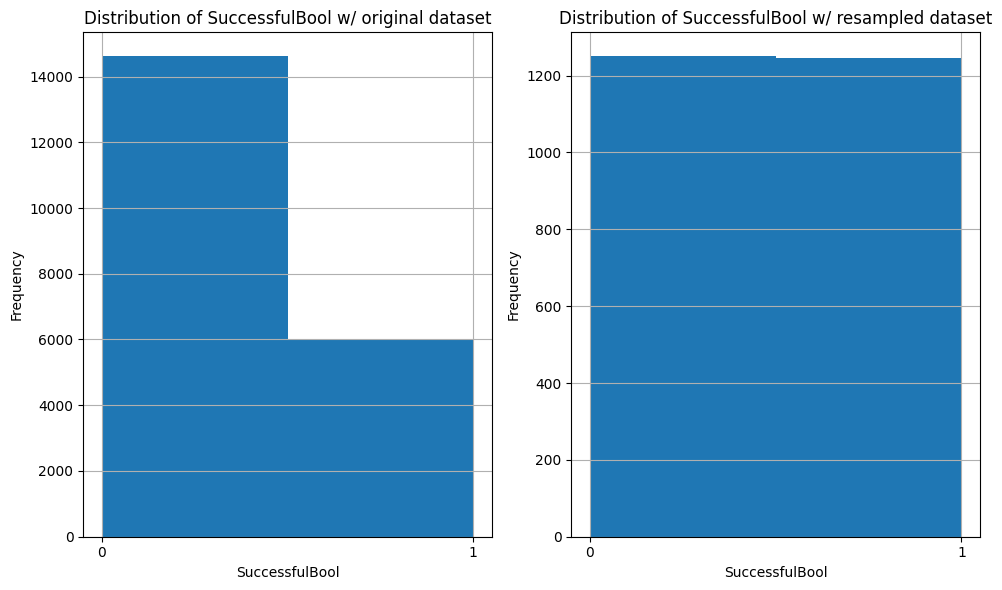

In [ ]:
# Distibution of SuccessfulBool
fig, (ax1,ax2) = plt.subplots(1, 2)
df[['SuccessfulBool']].hist('SuccessfulBool', ax=ax1, bins=2)
resampled_df[['SuccessfulBool']].hist('SuccessfulBool', ax=ax2, bins=2)
ax1.set_title('Distribution of SuccessfulBool w/ original dataset')
ax1.set_xlabel('SuccessfulBool')
ax1.set_ylabel('Frequency')
ax1.set_xticks(np.arange(0,2))
ax2.set_title('Distribution of SuccessfulBool w/ resampled dataset')
ax2.set_xlabel('SuccessfulBool')
ax2.set_ylabel('Frequency')
ax2.set_xticks(np.arange(0,2))
plt.show()

Text(0, 0.5, 'Dollars (USD)')

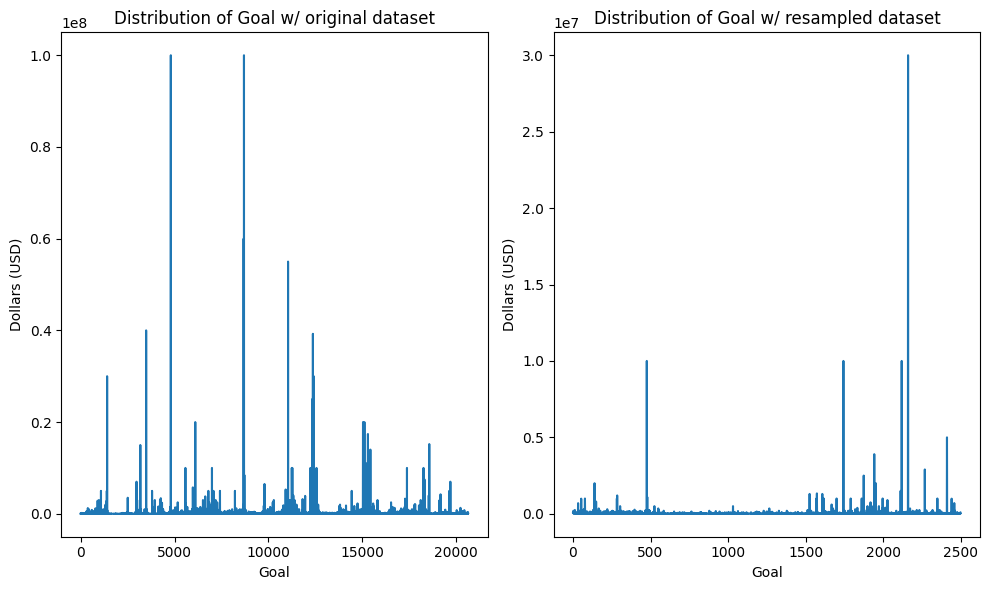

In [ ]:
# TODO: cant plot floats ????
# Distribution of goal
plt.subplot(1, 2, 1)
plt.plot(df['goal']);
plt.title('Distribution of Goal w/ original dataset')
plt.xlabel('Goal')
plt.ylabel('Dollars (USD)')
plt.subplot(1, 2, 2)
plt.plot(resampled_df['goal']);
plt.title('Distribution of Goal w/ resampled dataset')
plt.xlabel('Goal')
plt.ylabel('Dollars (USD)')

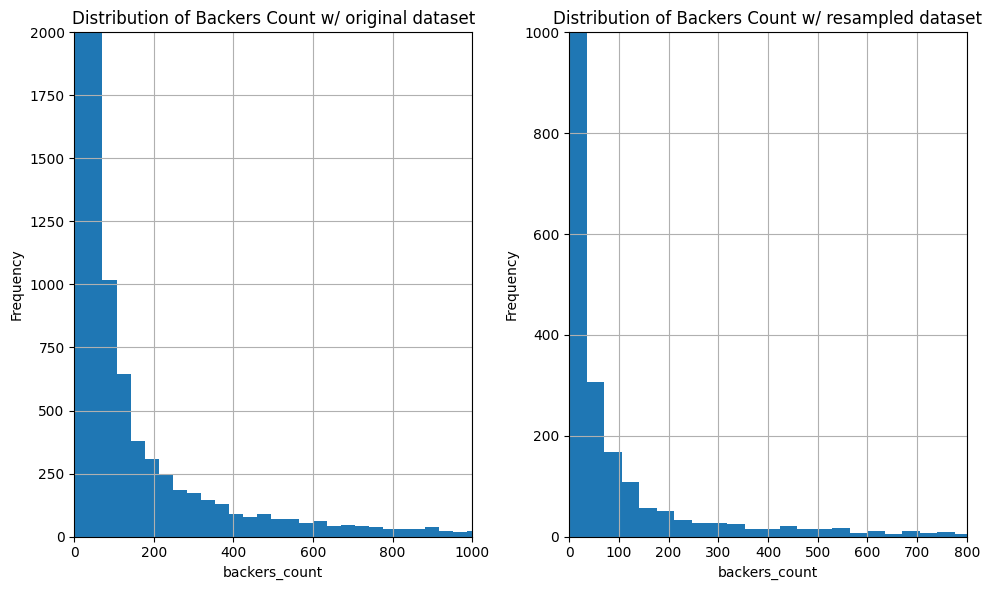

In [ ]:
# Distribution of backers count
fig, (ax1,ax2) = plt.subplots(1, 2)
df[['backers_count']].hist('backers_count', ax=ax1, bins=3000)
resampled_df[['backers_count']].hist('backers_count', ax=ax2, bins=3000)
ax1.set_title('Distribution of Backers Count w/ original dataset')
ax1.set_xlabel('backers_count')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0,1000)
ax1.set_ylim(0,2000)
ax2.set_title('Distribution of Backers Count w/ resampled dataset')
ax2.set_xlabel('backers_count')
ax2.set_ylabel('Frequency')
ax2.set_xlim(0,800)
ax2.set_ylim(0,1000)
plt.show()

In [ ]:
print(f"median: {resampled_df['backers_count'].median()}")
print(f"mode: {resampled_df['backers_count'].mode()}")
resampled_df['backers_count'].describe()

median: 27.0
mode: 0    0
Name: backers_count, dtype: int64


count      2495.000000
mean        272.423647
std        2253.584012
min           0.000000
25%           4.000000
50%          27.000000
75%         114.000000
max      105857.000000
Name: backers_count, dtype: float64

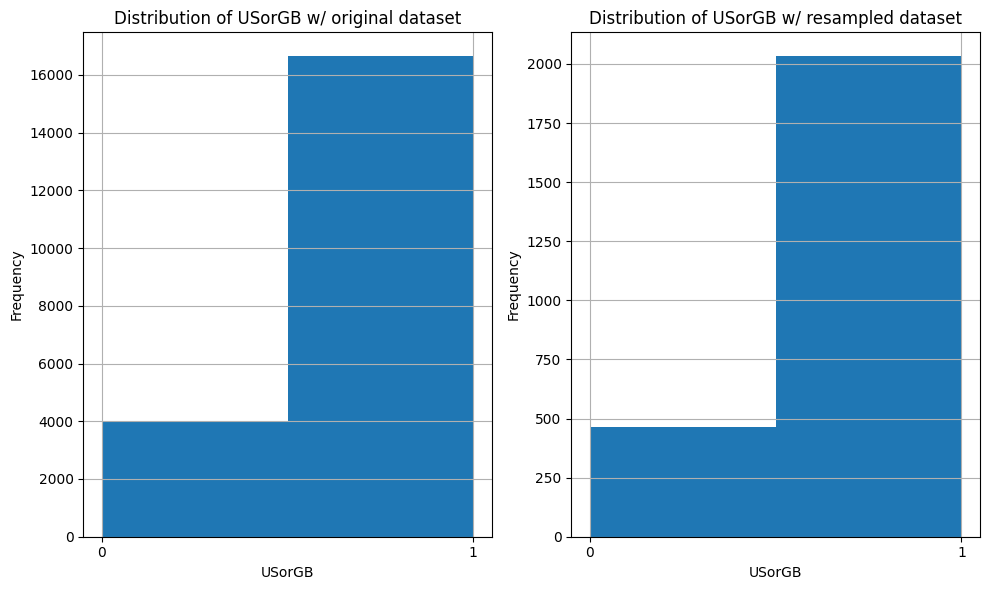

In [ ]:
# Distribution of USorGB
fig, (ax1,ax2) = plt.subplots(1, 2)
df[['USorGB']].hist('USorGB', ax=ax1, bins=2)
resampled_df[['USorGB']].hist('USorGB', ax=ax2, bins=2)
ax1.set_title('Distribution of USorGB w/ original dataset')
ax1.set_xlabel('USorGB')
ax1.set_ylabel('Frequency')
ax1.set_xticks(np.arange(0,2))
ax2.set_title('Distribution of USorGB w/ resampled dataset')
ax2.set_xlabel('USorGB')
ax2.set_ylabel('Frequency')
ax2.set_xticks(np.arange(0,2))
plt.show()

In [ ]:
print(f"median: {resampled_df['USorGB'].median()}")
print(f"mode: {resampled_df['USorGB'].mode()}")
resampled_df['USorGB'].describe()

median: 1.0
mode: 0    1
Name: USorGB, dtype: int64


count    2495.000000
mean        0.814429
std         0.388838
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: USorGB, dtype: float64

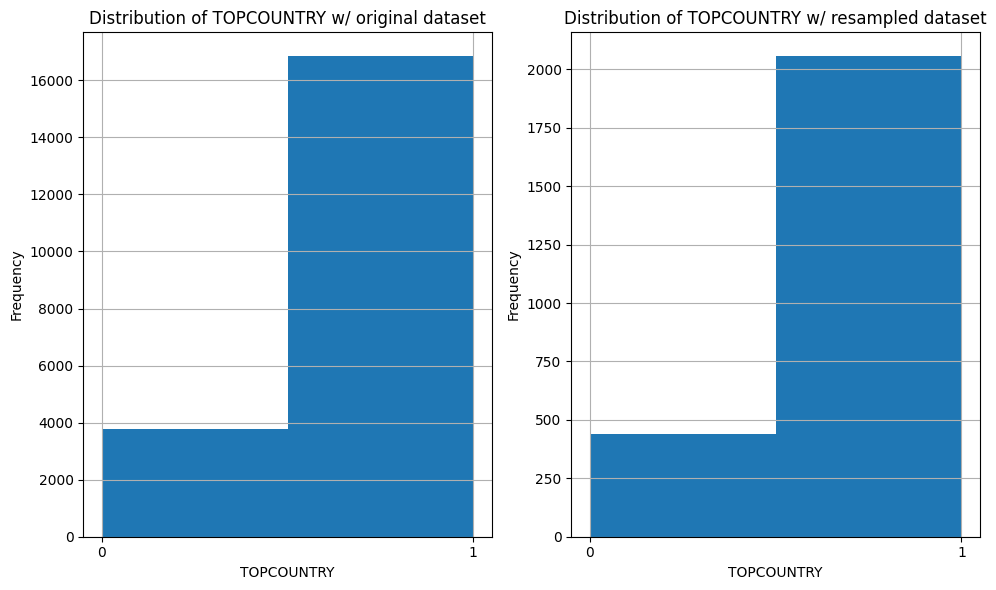

In [ ]:
# Distribution of TOPCOUNTRY
fig, (ax1,ax2) = plt.subplots(1, 2)
df[['TOPCOUNTRY']].hist('TOPCOUNTRY', ax=ax1, bins=2)
resampled_df[['TOPCOUNTRY']].hist('TOPCOUNTRY', ax=ax2, bins=2)
ax1.set_title('Distribution of TOPCOUNTRY w/ original dataset')
ax1.set_xlabel('TOPCOUNTRY')
ax1.set_ylabel('Frequency')
ax1.set_xticks(np.arange(0,2))
ax2.set_title('Distribution of TOPCOUNTRY w/ resampled dataset')
ax2.set_xlabel('TOPCOUNTRY')
ax2.set_ylabel('Frequency')
ax2.set_xticks(np.arange(0,2))
plt.show()

In [ ]:
print(f"median: {resampled_df['TOPCOUNTRY'].median()}")
print(f"mode: {resampled_df['TOPCOUNTRY'].mode()}")
resampled_df['TOPCOUNTRY'].describe()

median: 1.0
mode: 0    1
Name: TOPCOUNTRY, dtype: int64


count    2495.000000
mean        0.824048
std         0.380856
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: TOPCOUNTRY, dtype: float64

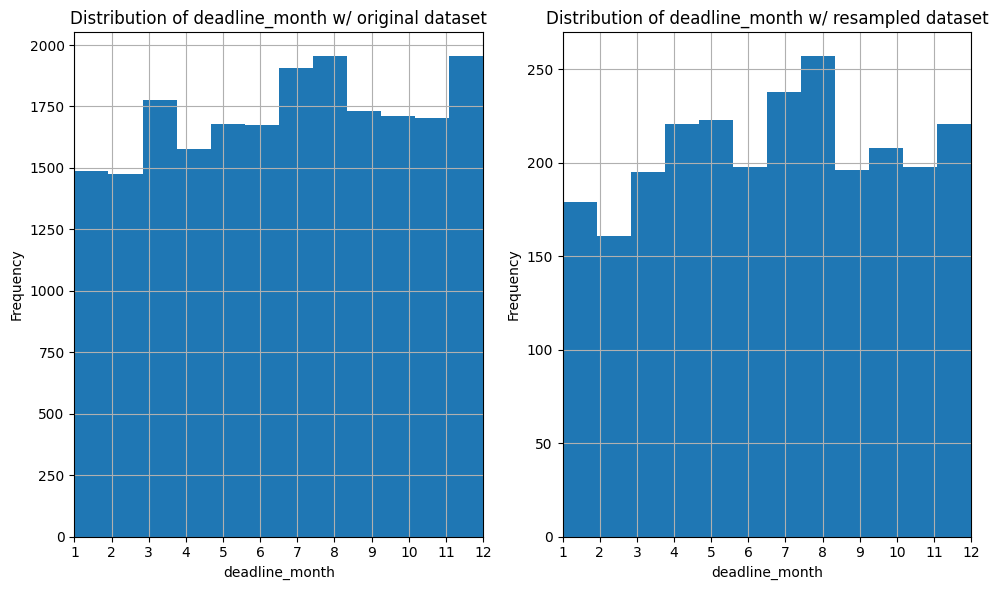

In [ ]:
# Distribution of deadline_month
fig, (ax1,ax2) = plt.subplots(1, 2)
df[['deadline_month']].hist('deadline_month', ax=ax1, bins=12)
resampled_df[['deadline_month']].hist('deadline_month', ax=ax2, bins=12)
ax1.set_title('Distribution of deadline_month w/ original dataset')
ax1.set_xlabel('deadline_month')
ax1.set_ylabel('Frequency')
ax1.set_xlim(1,12)
ax1.set_xticks(np.arange(1,13,1))
ax2.set_title('Distribution of deadline_month w/ resampled dataset')
ax2.set_xlabel('deadline_month')
ax2.set_ylabel('Frequency')
ax2.set_xlim(1,12)
ax2.set_xticks(np.arange(1,13,1))
plt.show()

In [ ]:
print(f"median: {resampled_df['deadline_month'].median()}")
print(f"mode: {resampled_df['deadline_month'].mode()}")
resampled_df['deadline_month'].describe()

median: 7.0
mode: 0    8
Name: deadline_month, dtype: int64


count    2495.000000
mean        6.680962
std         3.351863
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: deadline_month, dtype: float64

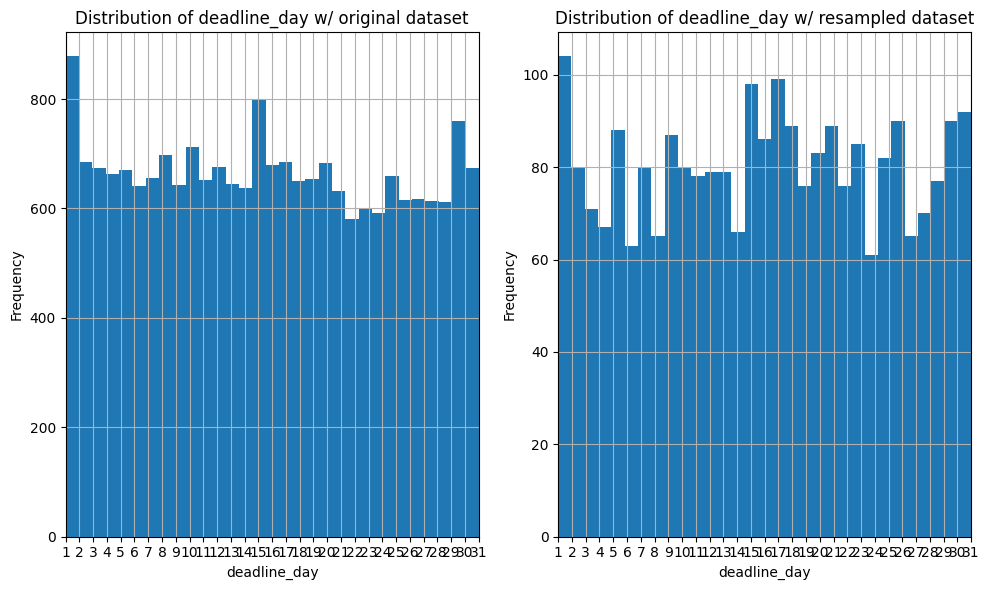

In [ ]:
# Distribution of deadline_day
fig, (ax1,ax2) = plt.subplots(1, 2)
df[['deadline_day']].hist('deadline_day', ax=ax1, bins=31)
resampled_df[['deadline_day']].hist('deadline_day', ax=ax2, bins=31)
ax1.set_title('Distribution of deadline_day w/ original dataset')
ax1.set_xlabel('deadline_day')
ax1.set_ylabel('Frequency')
ax1.set_xlim(1,31)
ax1.set_xticks(np.arange(1,32,1))
ax2.set_title('Distribution of deadline_day w/ resampled dataset')
ax2.set_xlabel('deadline_day')
ax2.set_ylabel('Frequency')
ax2.set_xlim(1,31)
ax2.set_xticks(np.arange(1,32,1))
plt.show()

In [ ]:
print(f"median: {resampled_df['deadline_day'].median()}")
print(f"mode: {resampled_df['deadline_day'].mode()}")
resampled_df['deadline_day'].describe()

median: 16.0
mode: 0    1
Name: deadline_day, dtype: int64


count    2495.000000
mean       16.059319
std         8.958902
min         1.000000
25%         9.000000
50%        16.000000
75%        24.000000
max        31.000000
Name: deadline_day, dtype: float64

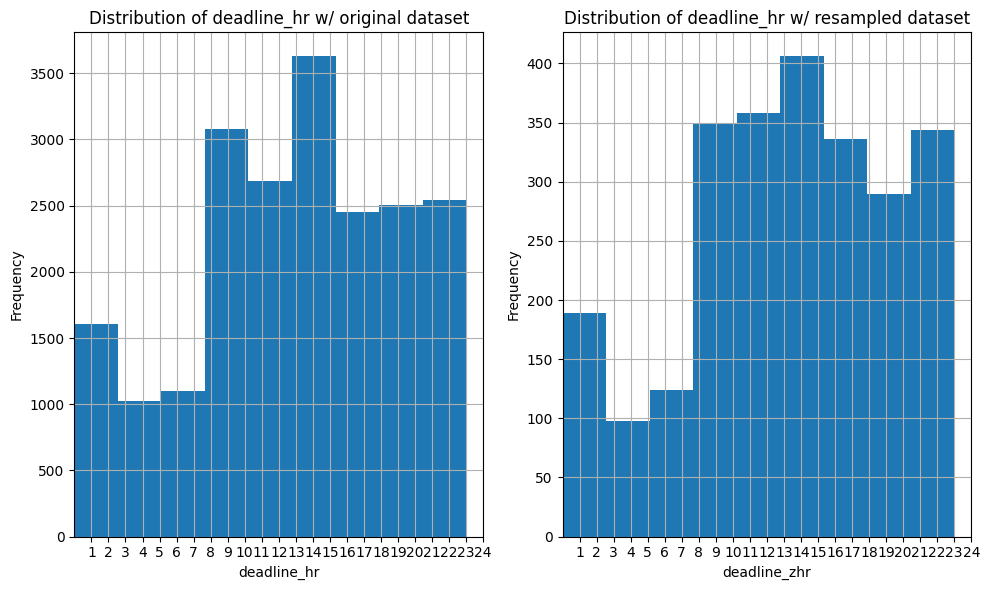

In [ ]:
# TODO: fix the squished graphs
# Distribution of deadline_hr
fig, (ax1,ax2) = plt.subplots(1, 2)
df[['deadline_hr']].hist('deadline_hr', ax=ax1, bins=9)
resampled_df[['deadline_hr']].hist('deadline_hr', ax=ax2, bins=9)
ax1.set_title('Distribution of deadline_hr w/ original dataset')
ax1.set_xlabel('deadline_hr')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0,23)
ax1.set_xticks(np.arange(1, 25, 1))
ax2.set_title('Distribution of deadline_hr w/ resampled dataset')
ax2.set_xlabel('deadline_zhr')
ax2.set_ylabel('Frequency')
ax2.set_xlim(0,23)
ax2.set_xticks(np.arange(1, 25, 1))
plt.show()

In [ ]:
print(f"median: {df['deadline_hr'].median()}")
print(f"mode: {df['deadline_hr'].mode()}")
df['deadline_hr'].describe()

median: 13.0
mode: 0    11
Name: deadline_hr, dtype: int64


count    20632.000000
mean        12.926473
std          6.037133
min          0.000000
25%          9.000000
50%         13.000000
75%         17.000000
max         23.000000
Name: deadline_hr, dtype: float64

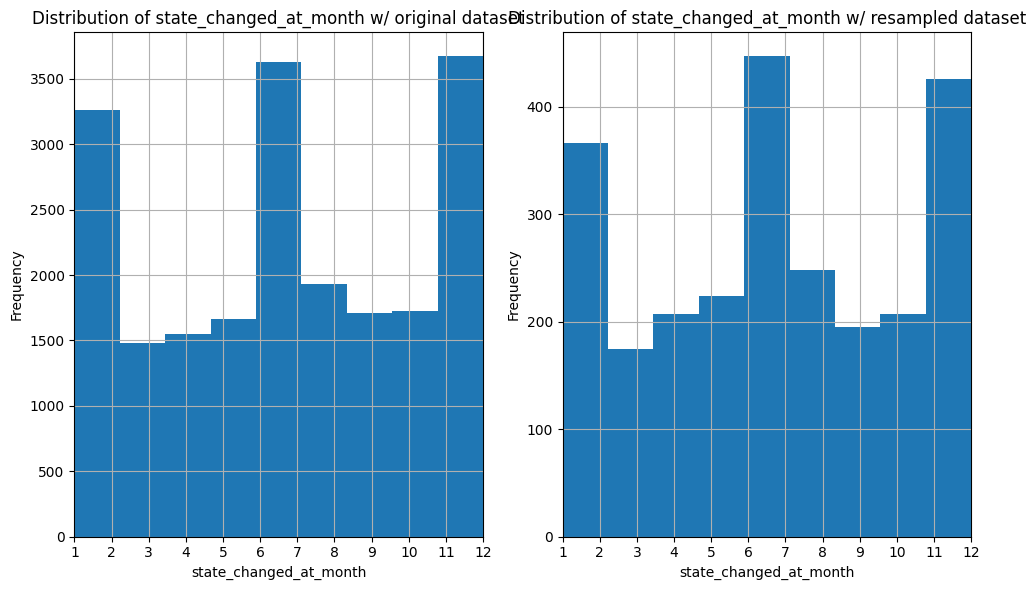

In [ ]:
# TODO: Fix titles
# Distribution of state_changed_at_month
fig, (ax1,ax2) = plt.subplots(1, 2)
df[['state_changed_at_month']].hist('state_changed_at_month', ax=ax1, bins=9)
resampled_df[['state_changed_at_month']].hist('state_changed_at_month', ax=ax2, bins=9)
ax1.set_title('Distribution of state_changed_at_month w/ original dataset')
ax1.set_xlabel('state_changed_at_month')
ax1.set_ylabel('Frequency')
ax1.set_xlim(1,12)
ax1.set_xticks(np.arange(1, 13, 1))
ax2.set_title('Distribution of state_changed_at_month w/ resampled dataset')
ax2.set_xlabel('state_changed_at_month')
ax2.set_ylabel('Frequency')
ax2.set_xlim(1,12)
ax2.set_xticks(np.arange(1, 13, 1))
plt.show()

In [ ]:
print(f"median: {resampled_df['state_changed_at_month'].median()}")
print(f"mode: {resampled_df['state_changed_at_month'].mode()}")
resampled_df['state_changed_at_month'].describe()

median: 7.0
mode: 0    8
Name: state_changed_at_month, dtype: int64


count    2495.000000
mean        6.677355
std         3.379574
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: state_changed_at_month, dtype: float64

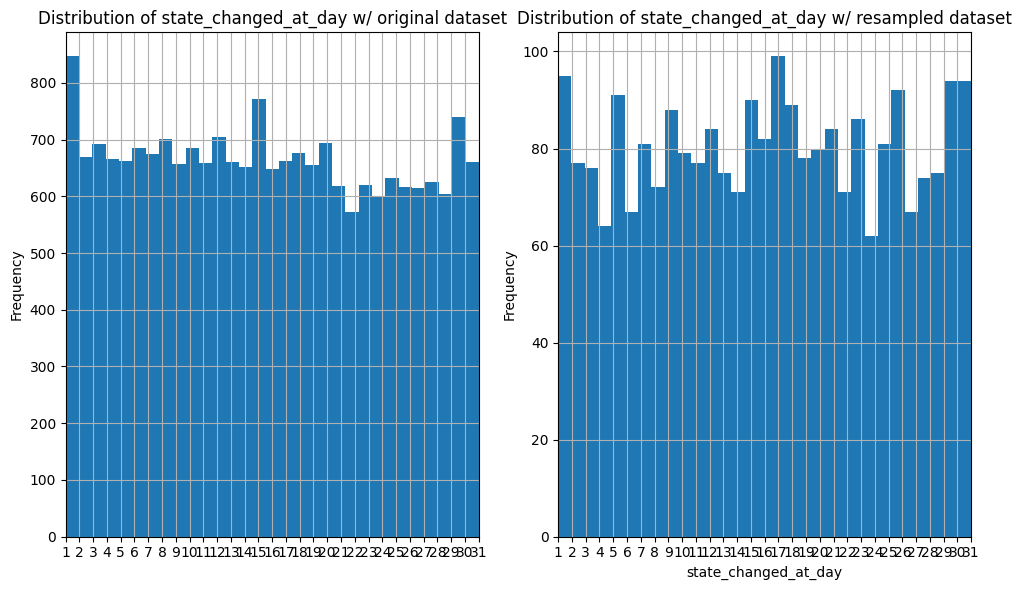

In [ ]:
# TODO: Fix xticks
# Distribution of state_changed_at_day
fig, (ax1,ax2) = plt.subplots(1, 2)
df[['state_changed_at_day']].hist('state_changed_at_day', ax=ax1, bins=31)
resampled_df[['state_changed_at_day']].hist('state_changed_at_day', ax=ax2, bins=31)
ax1.set_title('Distribution of state_changed_at_day w/ original dataset')
# ax1.set_xlabel('state_changed_at_day')
ax1.set_ylabel('Frequency')
ax1.set_xlim(1,31)
ax1.set_xticks(np.arange(1, 32, 1))
ax2.set_title('Distribution of state_changed_at_day w/ resampled dataset')
ax2.set_xlabel('state_changed_at_day')
ax2.set_ylabel('Frequency')
ax2.set_xlim(1,31)
ax2.set_xticks(np.arange(1, 32, 1))
plt.show()

In [ ]:
print(f"median: {resampled_df['state_changed_at_day'].median()}")
print(f"mode: {resampled_df['state_changed_at_day'].mode()}")
resampled_df['state_changed_at_day'].describe()

median: 16.0
mode: 0    17
Name: state_changed_at_day, dtype: int64


count    2495.000000
mean       16.098998
std         8.975252
min         1.000000
25%         9.000000
50%        16.000000
75%        24.000000
max        31.000000
Name: state_changed_at_day, dtype: float64

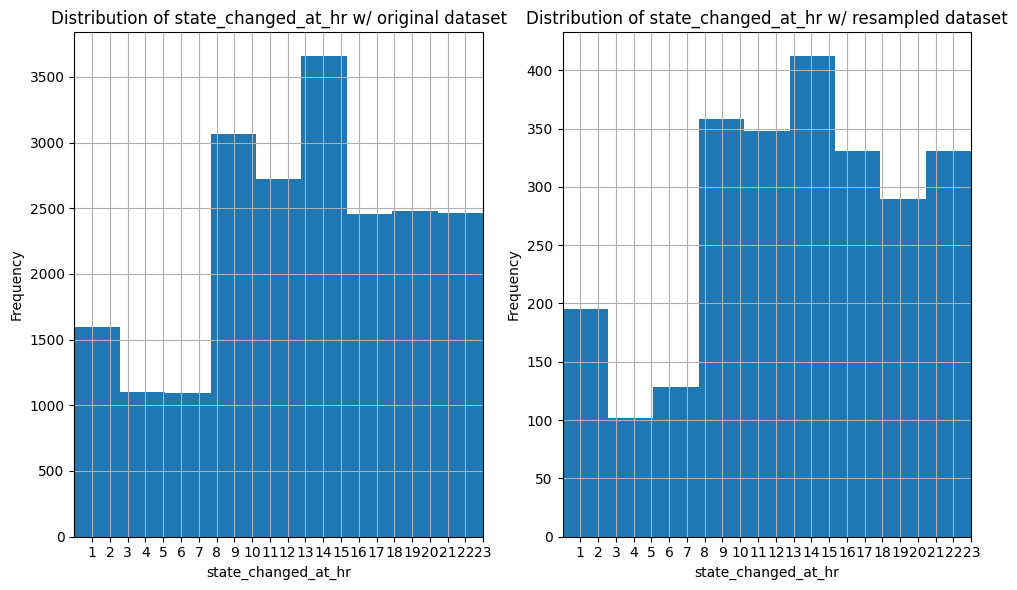

In [ ]:
# TODO: Fix xticks
# Distribution of state_changed_at_hr
fig, (ax1,ax2) = plt.subplots(1, 2)
df[['state_changed_at_hr']].hist('state_changed_at_hr', ax=ax1, bins=9)
resampled_df[['state_changed_at_hr']].hist('state_changed_at_hr', ax=ax2, bins=9)
ax1.set_title('Distribution of state_changed_at_hr w/ original dataset')
ax1.set_xlabel('state_changed_at_hr')
ax1.set_ylabel('Frequency')
ax1.set_xticks(np.arange(1, 25, 1))
ax1.set_xlim(0,23)
ax2.set_title('Distribution of state_changed_at_hr w/ resampled dataset')
ax2.set_xlabel('state_changed_at_hr')
ax2.set_ylabel('Frequency')
ax2.set_xticks(np.arange(1, 25, 1))
ax2.set_xlim(0,23)
plt.show()

In [ ]:
print(f"median: {df['state_changed_at_hr'].median()}")
print(f"mode: {df['state_changed_at_hr'].mode()}")
df['state_changed_at_hr'].describe()

median: 13.0
mode: 0    11
Name: state_changed_at_hr, dtype: int64


count    20632.000000
mean        12.855855
std          6.023725
min          0.000000
25%          9.000000
50%         13.000000
75%         17.000000
max         23.000000
Name: state_changed_at_hr, dtype: float64

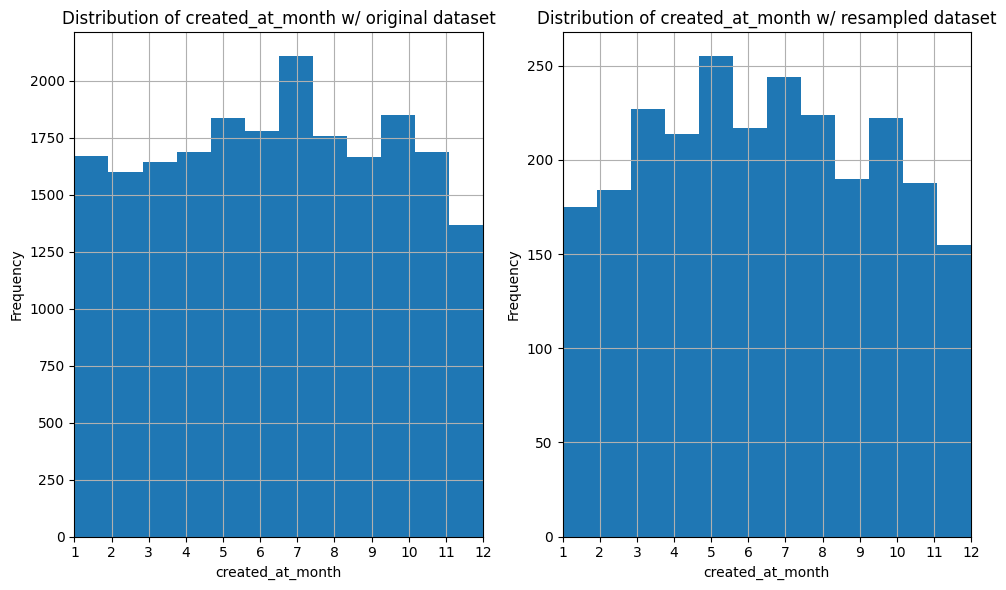

In [ ]:
# Distribution of created_at_month
fig, (ax1,ax2) = plt.subplots(1, 2)
df[['created_at_month']].hist('created_at_month', ax=ax1, bins=12)
resampled_df[['created_at_month']].hist('created_at_month', ax=ax2, bins=12)
ax1.set_title('Distribution of created_at_month w/ original dataset')
ax1.set_xlabel('created_at_month')
ax1.set_ylabel('Frequency')
ax1.set_xticks(np.arange(1, 13, 1))
ax1.set_xlim(1,12)
ax2.set_title('Distribution of created_at_month w/ resampled dataset')
ax2.set_xlabel('created_at_month')
ax2.set_ylabel('Frequency')
ax2.set_xticks(np.arange(1, 13, 1))
ax2.set_xlim(1,12)
plt.show()

In [ ]:
print(f"median: {resampled_df['created_at_month'].median()}")
print(f"mode: {resampled_df['created_at_month'].mode()}")
resampled_df['created_at_month'].describe()

median: 6.0
mode: 0    5
Name: created_at_month, dtype: int64


count    2495.000000
mean        6.418838
std         3.273016
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        12.000000
Name: created_at_month, dtype: float64

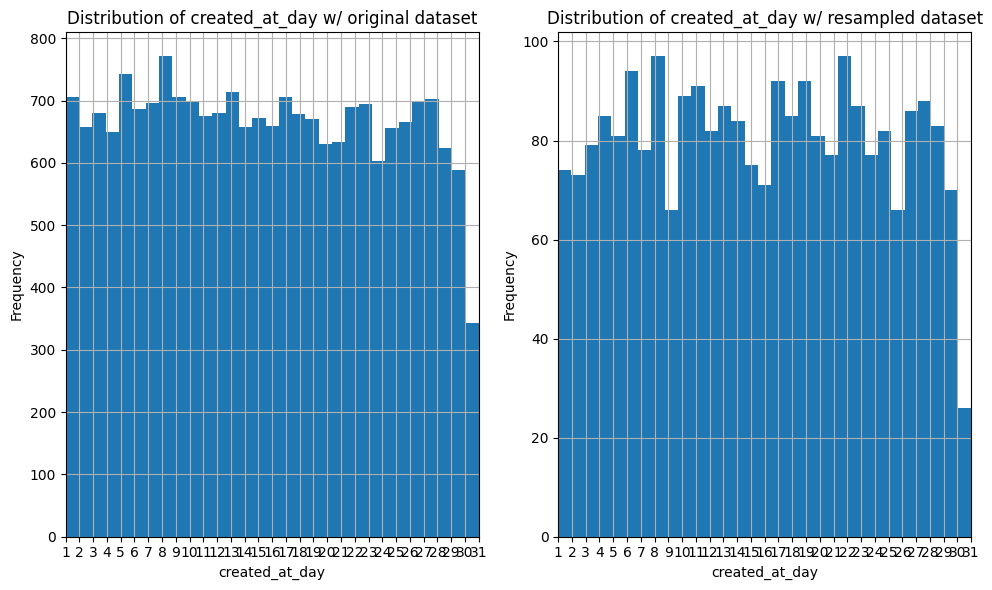

In [ ]:
# TODO: Fix xticks
# Distribution of created_at_day
fig, (ax1,ax2) = plt.subplots(1, 2)
df[['created_at_day']].hist('created_at_day', ax=ax1, bins=31)
resampled_df[['created_at_day']].hist('created_at_day', ax=ax2, bins=31)
ax1.set_title('Distribution of created_at_day w/ original dataset')
ax1.set_xlabel('created_at_day')
ax1.set_ylabel('Frequency')
ax1.set_xticks(np.arange(1, 32, 1))
ax1.set_xlim(1,31)
ax2.set_title('Distribution of created_at_day w/ resampled dataset')
ax2.set_xlabel('created_at_day')
ax2.set_ylabel('Frequency')
ax2.set_xticks(np.arange(1, 32, 1))
ax2.set_xlim(1,31)
plt.show()

In [ ]:
print(f"median: {df['created_at_day'].median()}")
print(f"mode: {df['created_at_day'].mode()}")
df['created_at_day'].describe()

median: 15.0
mode: 0    8
Name: created_at_day, dtype: int64


count    20632.000000
mean        15.542652
std          8.776659
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         31.000000
Name: created_at_day, dtype: float64

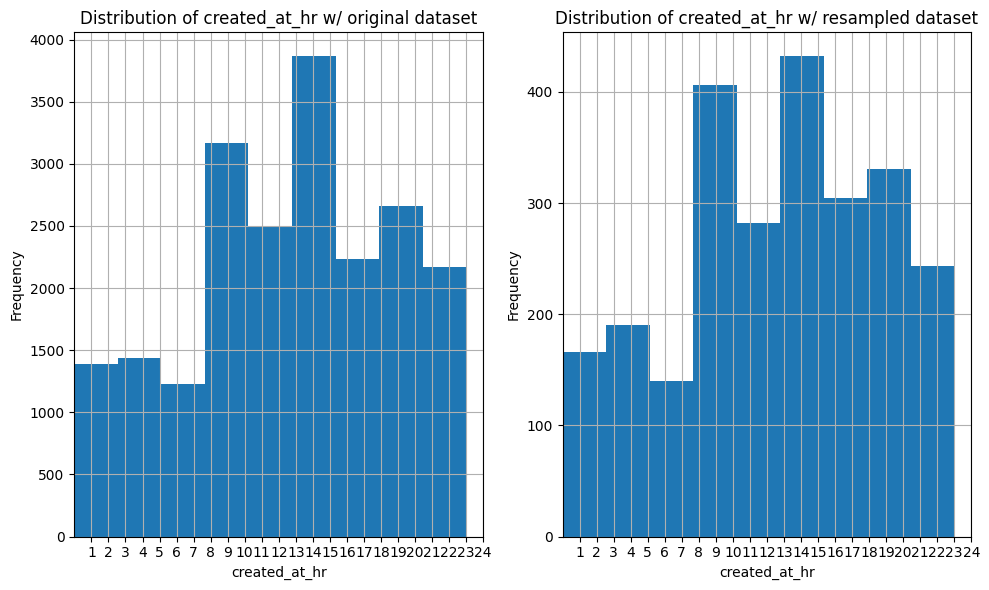

In [ ]:
# TODO: Fix xticks
# Distribution of created_at_hr
fig, (ax1,ax2) = plt.subplots(1, 2)
df[['created_at_hr']].hist('created_at_hr', ax=ax1, bins=9)
resampled_df[['created_at_hr']].hist('created_at_hr', ax=ax2, bins=9)
ax1.set_title('Distribution of created_at_hr w/ original dataset')
ax1.set_xlabel('created_at_hr')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0,23)
ax1.set_xticks(np.arange(1, 25, 1))
ax2.set_title('Distribution of created_at_hr w/ resampled dataset')
ax2.set_xlabel('created_at_hr')
ax2.set_ylabel('Frequency')
ax2.set_xlim(0,23)
ax2.set_xticks(np.arange(1, 25, 1))
plt.show()

In [ ]:
print(f"median: {df['created_at_hr'].median()}")
print(f"mode: {df['created_at_hr'].mode()}")
df['created_at_hr'].describe()

median: 13.0
mode: 0    15
Name: created_at_hr, dtype: int64


count    20632.000000
mean        12.673371
std          5.947005
min          0.000000
25%          9.000000
50%         13.000000
75%         17.000000
max         23.000000
Name: created_at_hr, dtype: float64

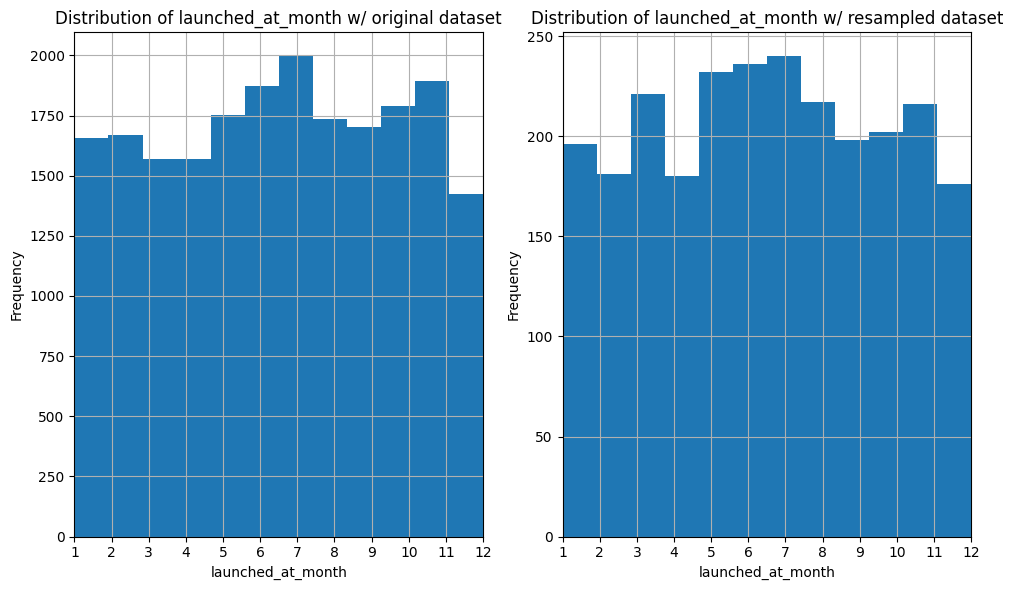

In [ ]:
# Distribution of launched_at_month
fig, (ax1,ax2) = plt.subplots(1, 2)
df[['launched_at_month']].hist('launched_at_month', ax=ax1, bins=12)
resampled_df[['launched_at_month']].hist('launched_at_month', ax=ax2, bins=12)
ax1.set_title('Distribution of launched_at_month w/ original dataset')
ax1.set_xlabel('launched_at_month')
ax1.set_ylabel('Frequency')
ax1.set_xticks(np.arange(1, 13, 1))
ax1.set_xlim(1,12)
ax2.set_title('Distribution of launched_at_month w/ resampled dataset')
ax2.set_xlabel('launched_at_month')
ax2.set_ylabel('Frequency')
ax2.set_xticks(np.arange(1, 13, 1))
ax2.set_xlim(1,12)
plt.show()

In [ ]:
print(f"median: {df['launched_at_month'].median()}")
print(f"mode: {df['launched_at_month'].mode()}")
df['launched_at_month'].describe()

median: 7.0
mode: 0    7
Name: launched_at_month, dtype: int64


count    20632.000000
mean         6.541828
std          3.379879
min          1.000000
25%          4.000000
50%          7.000000
75%          9.000000
max         12.000000
Name: launched_at_month, dtype: float64

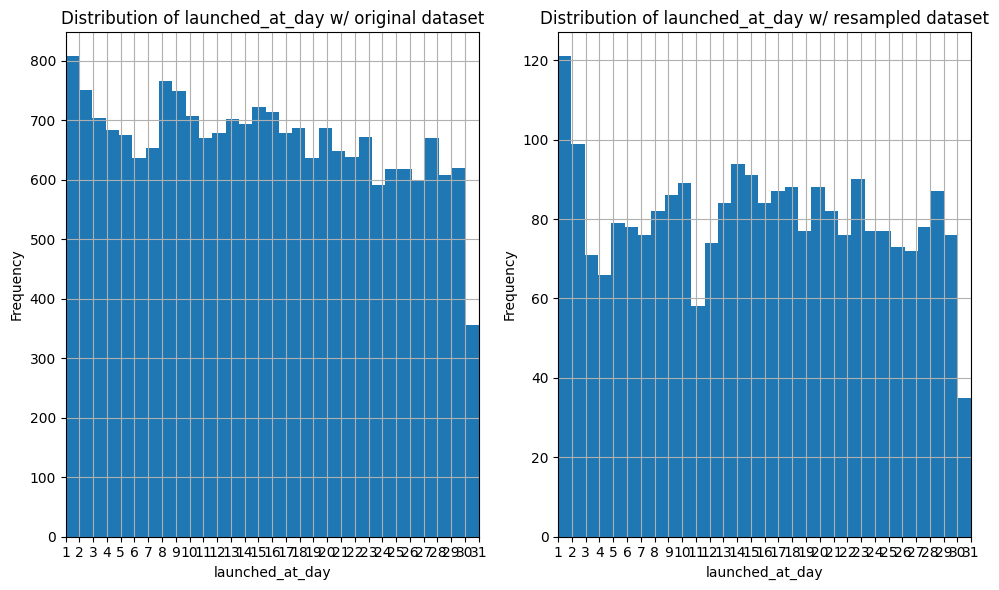

In [ ]:
# TODO: Fix xticks
# Distribution of launched_at_day
fig, (ax1,ax2) = plt.subplots(1, 2)
df[['launched_at_day']].hist('launched_at_day', ax=ax1, bins=31)
resampled_df[['launched_at_day']].hist('launched_at_day', ax=ax2, bins=31)
ax1.set_title('Distribution of launched_at_day w/ original dataset')
ax1.set_xlabel('launched_at_day')
ax1.set_ylabel('Frequency')
ax1.set_xticks(np.arange(1, 32, 1))
ax1.set_xlim(1,31)
ax2.set_title('Distribution of launched_at_day w/ resampled dataset')
ax2.set_xlabel('launched_at_day')
ax2.set_ylabel('Frequency')
ax2.set_xticks(np.arange(1, 32, 1))
ax2.set_xlim(1,31)
plt.show()

In [ ]:
print(f"median: {resampled_df['launched_at_day'].median()}")
print(f"mode: {resampled_df['launched_at_day'].mode()}")
resampled_df['launched_at_day'].describe()

median: 15.0
mode: 0    1
Name: launched_at_day, dtype: int64


count    2495.000000
mean       15.467335
std         8.844216
min         1.000000
25%         8.000000
50%        15.000000
75%        23.000000
max        31.000000
Name: launched_at_day, dtype: float64

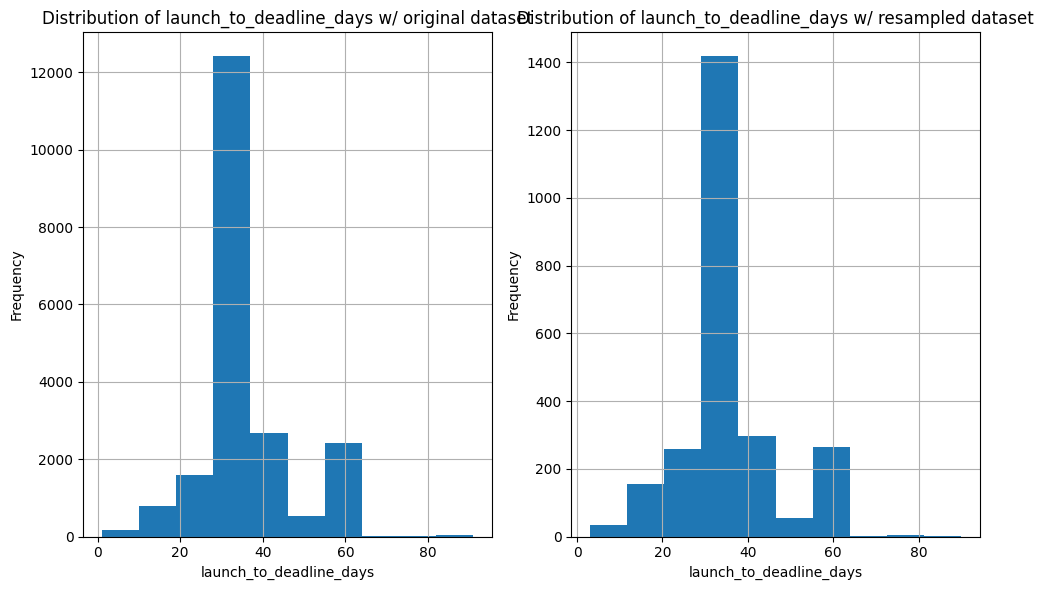

In [ ]:
# TODO: Fix titles
# Distribution of launch_to_deadline_days
fig, (ax1,ax2) = plt.subplots(1, 2)
df[['launch_to_deadline_days']].hist('launch_to_deadline_days', ax=ax1)
resampled_df[['launch_to_deadline_days']].hist('launch_to_deadline_days', ax=ax2)
ax1.set_title('Distribution of launch_to_deadline_days w/ original dataset')
ax1.set_xlabel('launch_to_deadline_days')
ax1.set_ylabel('Frequency')
ax2.set_title('Distribution of launch_to_deadline_days w/ resampled dataset')
ax2.set_xlabel('launch_to_deadline_days')
ax2.set_ylabel('Frequency')
plt.show()

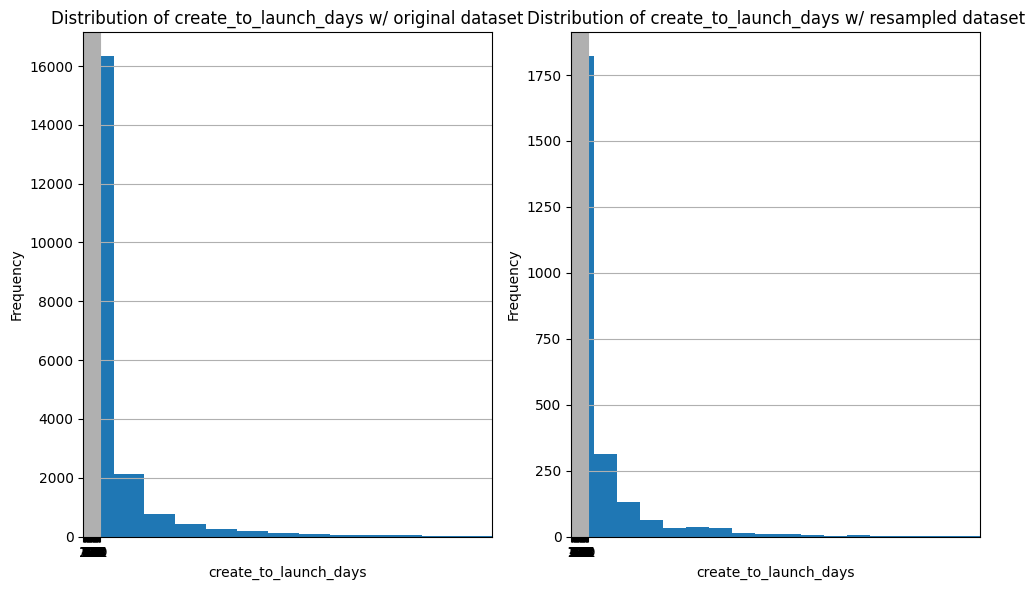

In [ ]:
# TODO: Fix title
# Distribution of create_to_launch_days
fig, (ax1,ax2) = plt.subplots(1, 2)
df[['create_to_launch_days']].hist('create_to_launch_days', ax=ax1, bins=31)
resampled_df[['create_to_launch_days']].hist('create_to_launch_days', ax=ax2, bins=31)
ax1.set_title('Distribution of create_to_launch_days w/ original dataset')
ax1.set_xlabel('create_to_launch_days')
ax1.set_ylabel('Frequency')
ax1.set_xlim(1,750)
ax1.set_xticks(np.arange(1, 32, 1))
ax2.set_title('Distribution of create_to_launch_days w/ resampled dataset')
ax2.set_xlabel('create_to_launch_days')
ax2.set_ylabel('Frequency')
ax2.set_xlim(1,750)
ax2.set_xticks(np.arange(1, 32, 1))
plt.show()

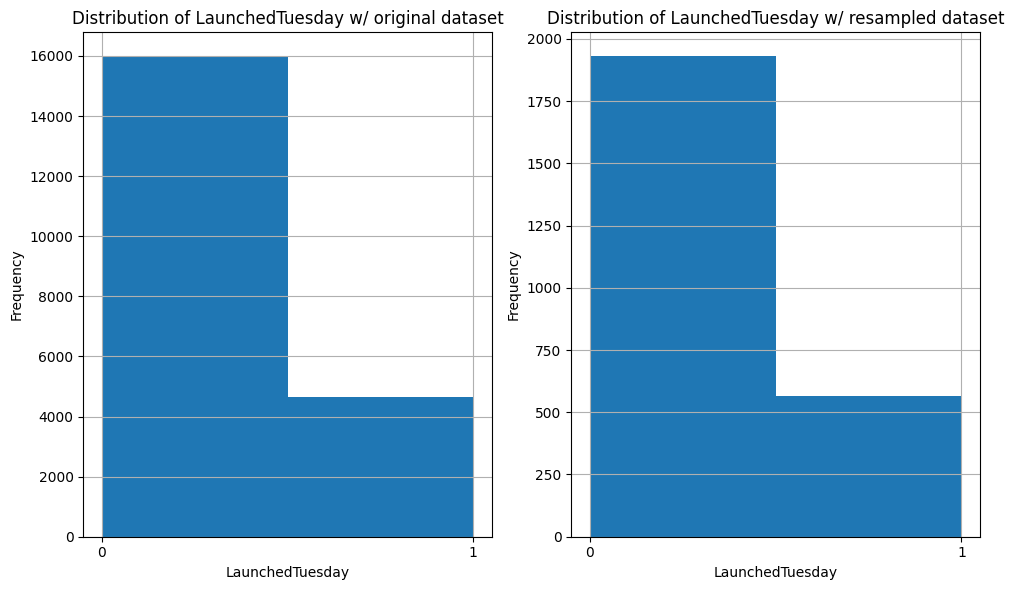

In [ ]:
# Distribution of LaunchedTuesday
fig, (ax1,ax2) = plt.subplots(1, 2)
df[['LaunchedTuesday']].hist('LaunchedTuesday', ax=ax1, bins=2)
resampled_df[['LaunchedTuesday']].hist('LaunchedTuesday', ax=ax2, bins=2)
ax1.set_title('Distribution of LaunchedTuesday w/ original dataset')
ax1.set_xlabel('LaunchedTuesday')
ax1.set_ylabel('Frequency')
ax1.set_xticks(np.arange(0,2))
ax2.set_title('Distribution of LaunchedTuesday w/ resampled dataset')
ax2.set_xlabel('LaunchedTuesday')
ax2.set_ylabel('Frequency')
ax2.set_xticks(np.arange(0,2))
plt.show()

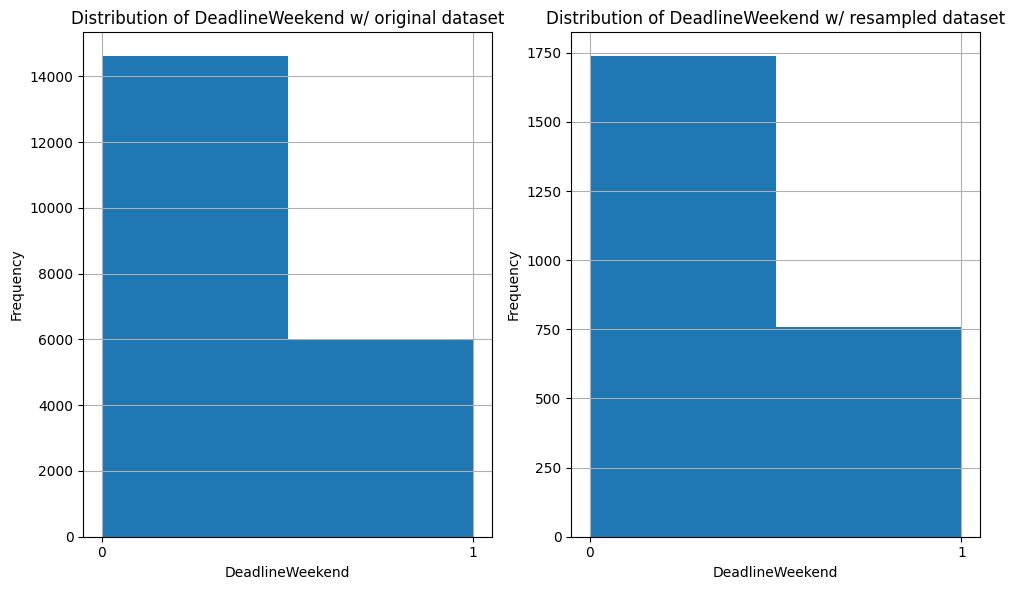

In [ ]:
# Distribution of DeadlineWeekend
fig, (ax1,ax2) = plt.subplots(1, 2)
df[['DeadlineWeekend']].hist('DeadlineWeekend', ax=ax1, bins=2)
resampled_df[['DeadlineWeekend']].hist('DeadlineWeekend', ax=ax2, bins=2)
ax1.set_title('Distribution of DeadlineWeekend w/ original dataset')
ax1.set_xlabel('DeadlineWeekend')
ax1.set_ylabel('Frequency')
ax1.set_xticks(np.arange(0,2))
ax2.set_title('Distribution of DeadlineWeekend w/ resampled dataset')
ax2.set_xlabel('DeadlineWeekend')
ax2.set_ylabel('Frequency')
ax2.set_xticks(np.arange(0,2))
plt.show()

## Feauture Importance

In [ ]:
b = resampled_numerical['SuccessfulBool']
A = resampled_numerical.drop(['SuccessfulBool'],axis=1)

In [ ]:
A_train, A_test, b_train, b_test = train_test_split(A,b,test_size=0.2,random_state=0)
A_train.shape, A_test.shape, b_train.shape, b_test.shape

((1996, 21), (499, 21), (1996,), (499,))

In [ ]:
y = df_zero['SuccessfulBool']
X = df_zero.drop(['SuccessfulBool'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1000, 21), (250, 21), (1000,), (250,))

In [ ]:
y1 = df_one['SuccessfulBool']
X1= df_one.drop(['SuccessfulBool'],axis=1)

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=0)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((996, 21), (249, 21), (996,), (249,))

##Random Forest Classifier

In [ ]:
classifier_rand = RandomForestClassifier(n_estimators=10,criterion='entropy')
classifier_rand.fit(A_train,b_train)
y_pred_rnd = classifier_rand.predict(A_test)

In [ ]:
classifier1 = pd.Series(classifier_rand.feature_importances_,index = A_train.columns)
classifier1 = classifier1.sort_values(ascending = False)

accuracy = accuracy_score(b_test, y_pred_rnd)

print("Random Forest Classifier Accuracy:",accuracy)

Random Forest Classifier Accuracy: 0.8957915831663327


Text(0.5, 1.0, 'Confusion Matrix')

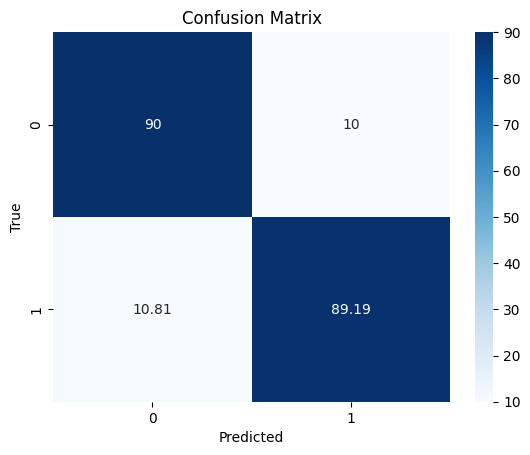

In [ ]:
cm_rnd = confusion_matrix(b_test, y_pred_rnd)
total = cm_rnd.sum(axis=1)[:, np.newaxis]
cm_rnd = np.round(cm_rnd / total * 100, 2)
sns.heatmap(cm_rnd, annot=True, cmap='Blues', fmt='g')

# add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

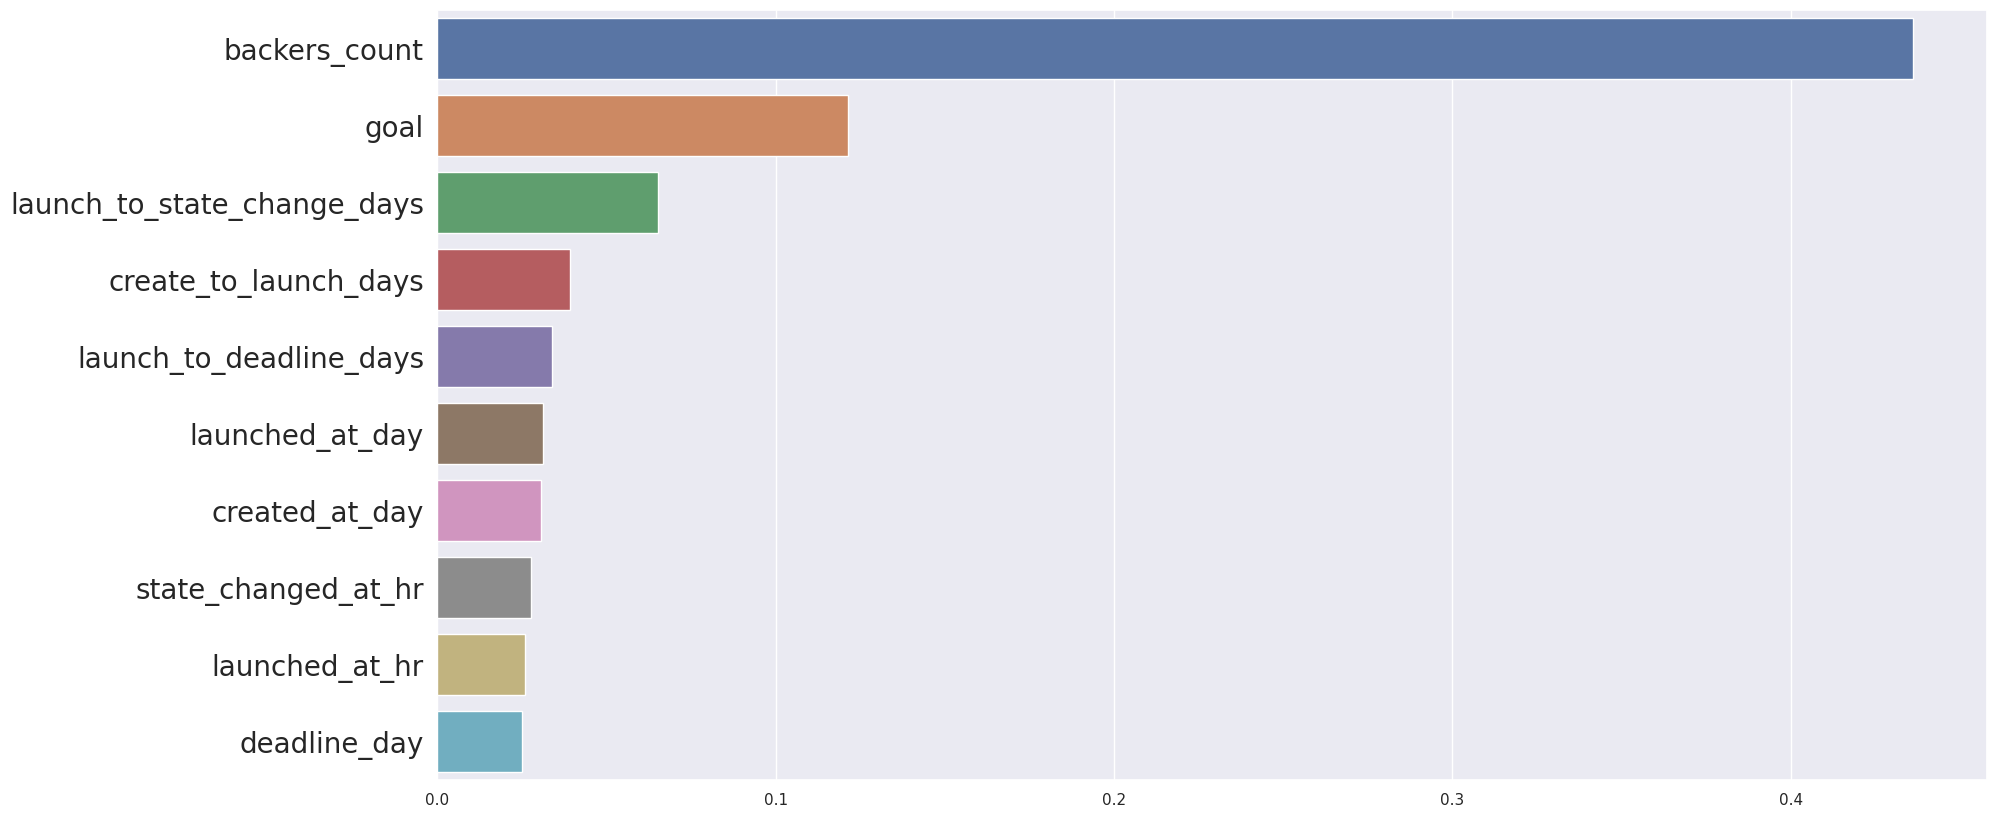

In [ ]:
plt.figure(figsize=(20,10))
sns.set()
p = sns.barplot(x=classifier1.head(10),y=classifier1.index[:10],orient='h')
# p.set_xticklabels(p.get_xticklabels(), fontsize=20)
p.set_yticklabels(classifier1.index[:10],fontsize=20)
# plt.ylabel("",fontsize=16)
plt.show()

In [ ]:
print(classification_report(b_test, y_pred_rnd ))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       240
           1       0.88      0.89      0.89       259

    accuracy                           0.88       499
   macro avg       0.88      0.88      0.88       499
weighted avg       0.88      0.88      0.88       499



##Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(A_train, b_train)
y_pred_nb = gnb.predict(A_test)
accuracy_nb = accuracy_score(b_test, y_pred_nb)
print("Naive Bayes Accuracy:",accuracy_nb)

Naive Bayes Accuracy: 0.6753507014028056


Text(0.5, 1.0, 'Confusion Matrix')

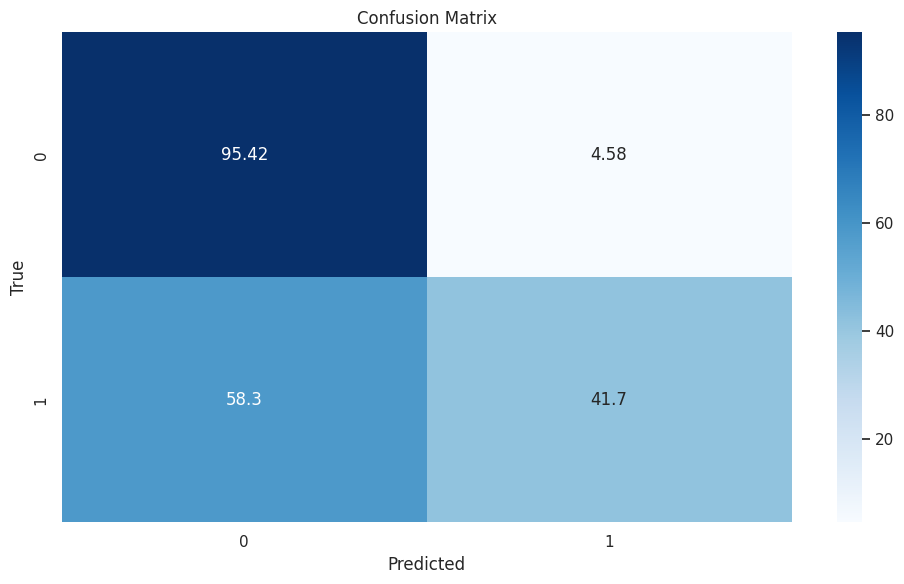

In [ ]:
cm = confusion_matrix(b_test, y_pred_nb)
total = cm.sum(axis=1)[:, np.newaxis]
cm = np.round(cm / total * 100, 2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [ ]:
print(classification_report(b_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.60      0.95      0.74       240
           1       0.91      0.42      0.57       259

    accuracy                           0.68       499
   macro avg       0.76      0.69      0.66       499
weighted avg       0.76      0.68      0.65       499



## Decision Tree

In [ ]:
clf = DecisionTreeClassifier()

# Train the decision tree classifier on the training data
clf.fit(A_train, b_train)

# Make predictions on the testing data
y_pred_dt = clf.predict(A_test)

# Calculate the accuracy of the classifier
accuracy_dt = accuracy_score(b_test, y_pred_dt)

print("Decision Tree Accuracy:",accuracy_dt)

Decision Tree Accuracy: 0.8917835671342685


Text(0.5, 1.0, 'Confusion Matrix')

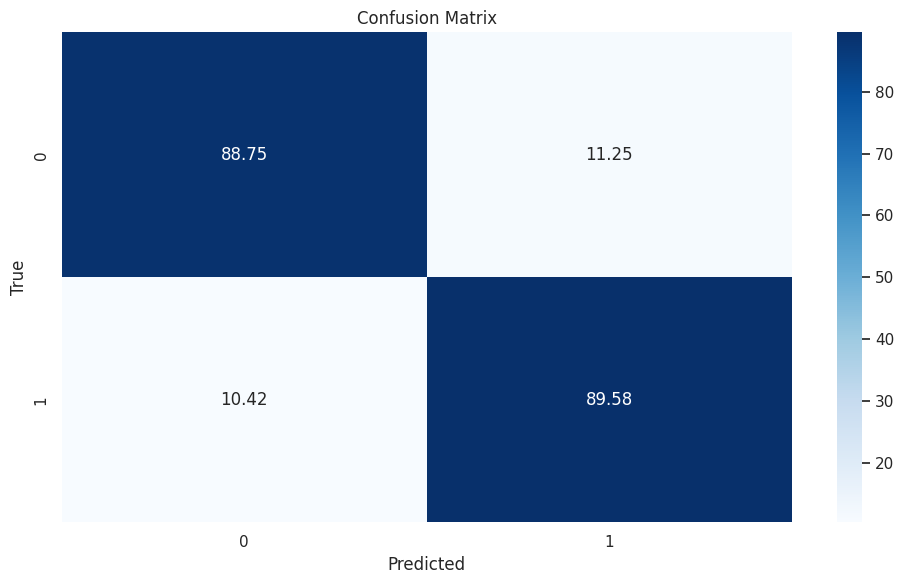

In [ ]:
#Confusion Matrix
cm = confusion_matrix(b_test, y_pred_dt)
total = cm.sum(axis=1)[:, np.newaxis]
cm = np.round(cm / total * 100, 2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [ ]:
#Numbered.
# cm = confusion_matrix(y_test, y_pred_dt)
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# # add labels and title
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')

In [ ]:
print(classification_report(b_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       240
           1       0.90      0.90      0.90       259

    accuracy                           0.89       499
   macro avg       0.89      0.89      0.89       499
weighted avg       0.89      0.89      0.89       499



##Support Vector Machine (Linear)

In [ ]:
clf_linear = SVC(kernel='linear')

# Train the decision tree classifier on the training data
clf_linear.fit(A_train, b_train)

# Make predictions on the testing data
y_pred_svm = clf_linear.predict(A_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(b_test, y_pred_svm)

print("Support Vector Machine Accuracy Linear:",accuracy)

Support Vector Machine Accuracy Linear: 0.9198396793587175


Text(0.5, 1.0, 'Confusion Matrix')

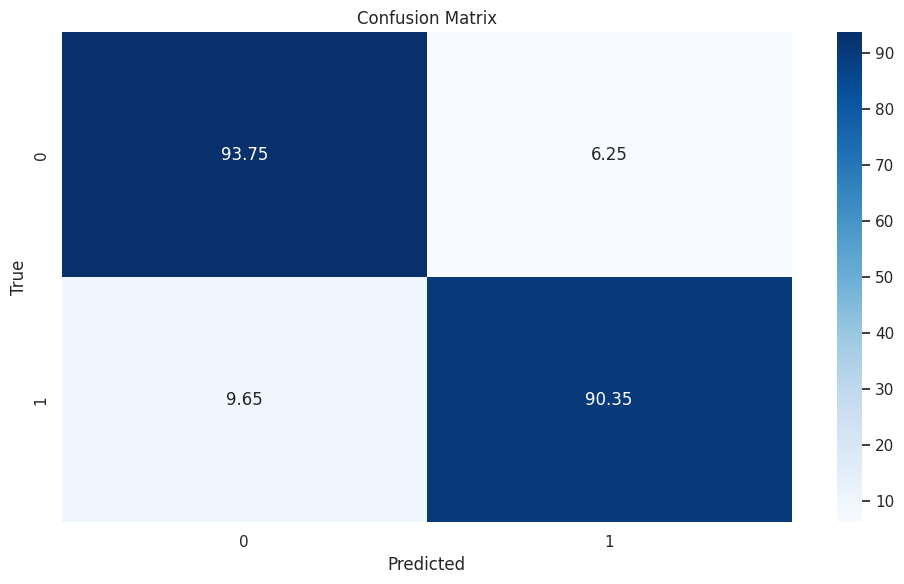

In [ ]:
#Confusion Matrix
cm = confusion_matrix(b_test, y_pred_svm)
total = cm.sum(axis=1)[:, np.newaxis]
cm = np.round(cm / total * 100, 2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [ ]:
print(classification_report(b_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       240
           1       0.94      0.90      0.92       259

    accuracy                           0.92       499
   macro avg       0.92      0.92      0.92       499
weighted avg       0.92      0.92      0.92       499



In [ ]:
# clf = SVC()

# # Train the decision tree classifier on the training data
# clf.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred_svm = clf.predict(X_test)

# # Calculate the accuracy of the classifier
# accuracy = accuracy_score(y_test, y_pred_svm)

# print("Support Vector Machine Accuracy:",accuracy)

In [ ]:
# #Confusion Matrix
# cm = confusion_matrix(y_test, y_pred_svm)
# total = cm.sum(axis=1)[:, np.newaxis]
# cm = np.round(cm / total * 100, 2)
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# # add labels and title
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')

##Support Vector Classifiaction(RBF)

In [ ]:
clf_rbf = SVC(kernel='rbf', gamma='scale', random_state=21)

# Train the decision tree classifier on the training data
clf_rbf.fit(A_train, b_train)

# Make predictions on the testing data
y_pred_svm_rbf = clf_rbf.predict(A_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(b_test, y_pred_svm_rbf)

print("Support Vector Machine Accuracy:",accuracy)

Support Vector Machine Accuracy: 0.6132264529058116


In [ ]:
print(classification_report(b_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       240
           1       0.94      0.90      0.92       259

    accuracy                           0.92       499
   macro avg       0.92      0.92      0.92       499
weighted avg       0.92      0.92      0.92       499



Text(0.5, 1.0, 'Confusion Matrix')

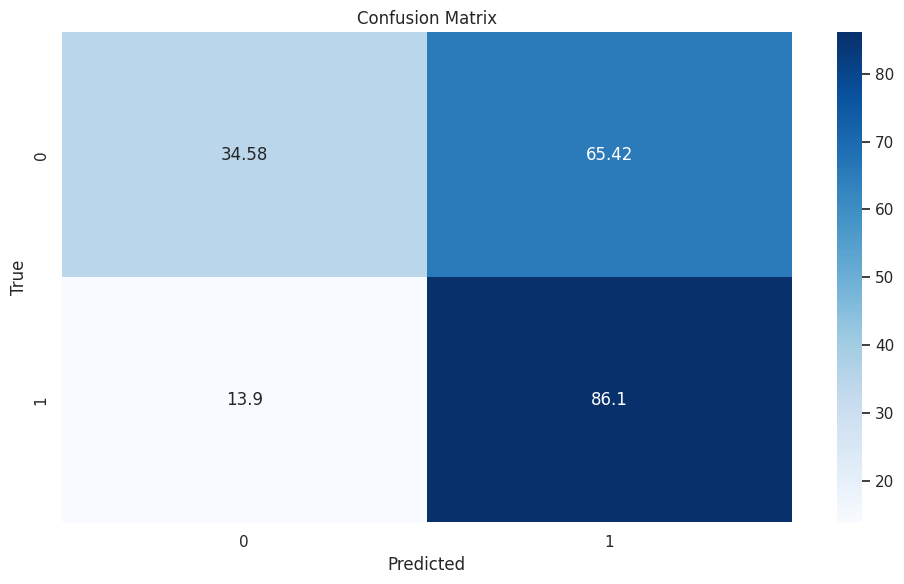

In [ ]:
cm = confusion_matrix(b_test, y_pred_svm_rbf)
total = cm.sum(axis=1)[:, np.newaxis]
cm = np.round(cm / total * 100, 2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

##XGBOOST

In [ ]:
clf_xgb = XGBClassifier()

# Train the decision tree classifier on the training data
clf_xgb.fit(A_train, b_train)

# Make predictions on the testing data
y_pred_xgb = clf_xgb.predict(A_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(b_test, y_pred_xgb)

print("XGBoost Classifier Accuracy:",accuracy)

XGBoost Classifier Accuracy: 0.9098196392785571


In [ ]:
print(classification_report(b_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       240
           1       0.91      0.92      0.91       259

    accuracy                           0.91       499
   macro avg       0.91      0.91      0.91       499
weighted avg       0.91      0.91      0.91       499



Text(0.5, 1.0, 'Confusion Matrix')

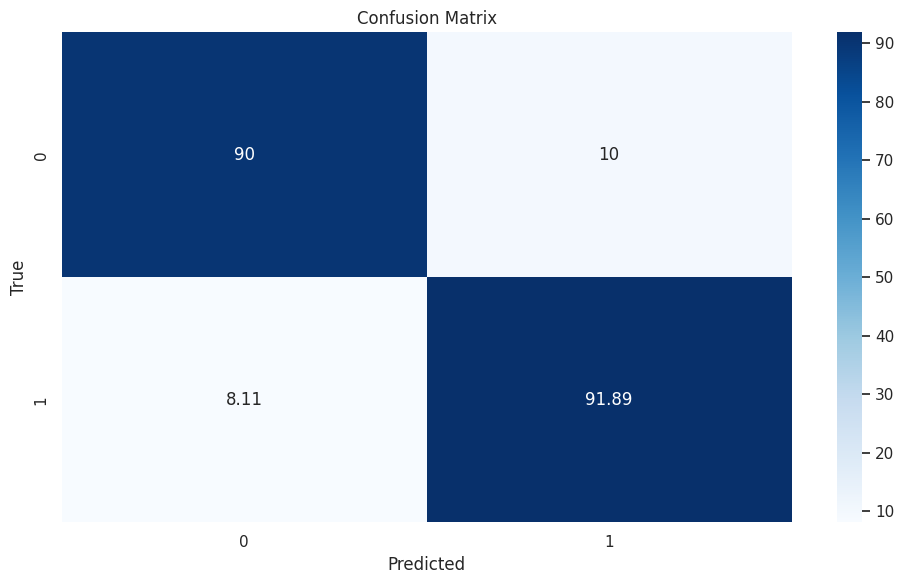

In [ ]:
cm = confusion_matrix(b_test, y_pred_xgb)
total = cm.sum(axis=1)[:, np.newaxis]
cm = np.round(cm / total * 100, 2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

**concerns**: we should also remove columns [deadline_yr, state_changed_at_yr, created_at_yr, launched_at_year]

**reason**: These columns pertain to the year of the project. This logically would not make sense to have such features to predict new projects. This could lead to bias for years where there were many successful projects.

##Hyper parameter tuning

In [ ]:
b_top = resampled_numerical['SuccessfulBool']
A_top = resampled_numerical.drop(['SuccessfulBool', 'deadline_hr','deadline_month','LaunchedTuesday','USorGB','TOPCOUNTRY'],axis=1)

In [ ]:
A_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2495 entries, 1 to 2500
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   created_at_month             2495 non-null   int64  
 1   goal                         2495 non-null   float64
 2   created_at_hr                2495 non-null   int64  
 3   state_changed_at_month       2495 non-null   int64  
 4   backers_count                2495 non-null   int64  
 5   create_to_launch_days        2495 non-null   int64  
 6   state_changed_at_hr          2495 non-null   int64  
 7   launch_to_state_change_days  2495 non-null   int64  
 8   launched_at_day              2495 non-null   int64  
 9   launched_at_month            2495 non-null   int64  
 10  deadline_day                 2495 non-null   int64  
 11  DeadlineWeekend              2495 non-null   int64  
 12  state_changed_at_day         2495 non-null   int64  
 13  launch_to_deadline

In [ ]:
A_train, A_test, b_train, b_test = train_test_split(A_top,b_top,test_size=0.2,random_state=0)
A_train.shape, A_test.shape, b_train.shape, b_test.shape

((1996, 16), (499, 16), (1996,), (499,))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

In [ ]:
X_dtrain = A_train.loc[:, ['backers_count','launch_to_state_change_days']]
y_dtrain = b_train
X_dtest = A_test.loc[:, ['backers_count','launch_to_state_change_days']]
y_dtest = b_test

In [ ]:
X_dtrain.shape

(1996, 2)

In [ ]:
y_dtrain.shape

(1996,)

In [ ]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'],'gamma': [0.1, 1, 10]}

# Create an SVC object
svc = SVC()

# Create a GridSearchCV object
random_search_svc = RandomizedSearchCV(svc, param_distributions=param_grid,refit=True,verbose=100,n_jobs=-1,cv=3,random_state = 42)


# Fit the GridSearchCV object to the data
random_search_svc.fit(X_dtrain ,y_dtrain)


# Print the best parameters and the corresponding score
print("Best parameters: ", random_search_svc.best_params_)
print("Best score: ", random_search_svc.best_score_)

y_pred = random_search_svc.predict(X_dtest)

# calculate accuracy score of best model on test set
accuracy = accuracy_score(y_dtest, y_pred)
print("Accuracy score: ", accuracy)
print(classification_report(b_test, y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters:  {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
Best score:  0.8131334341860658
Accuracy score:  0.8216432865731463
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       240
           1       0.81      0.86      0.83       259

    accuracy                           0.82       499
   macro avg       0.82      0.82      0.82       499
weighted avg       0.82      0.82      0.82       499



####BernoulliNB Hyperparameter

In [ ]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB(alpha=1.0, binarize=0.0)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10.0]}
grid_search_nb = GridSearchCV(nb, param_grid, cv=5)
grid_search_nb.fit(A_train, b_train)

print("Best alpha:", grid_search_nb.best_params_['alpha'])
print("Best validation score:", grid_search_nb.best_score_)

Best alpha: 0.1
Best validation score: 0.6007130325814536


In [ ]:
from sklearn.metrics import accuracy_score

nb = BernoulliNB(alpha=0.1, binarize=0.0)
nb.fit(A_train, b_train)
y_pred = nb.predict(A_test)
accuracy = accuracy_score(b_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.6032064128256514


####Gausian NB Hyperparameter

In [ ]:
# define the parameter grid to search over
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(gnb, param_grid=param_grid, cv=5)
grid_search.fit(A_train, b_train)

# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# use the best hyperparameters to train a new classifier and evaluate it on the test set
best_gnb = grid_search.best_estimator_
y_pred = best_gnb.predict(A_test)
print(classification_report(b_test, y_pred))

Best hyperparameters: {'var_smoothing': 1e-09}
              precision    recall  f1-score   support

           0       0.60      0.95      0.74       240
           1       0.91      0.42      0.57       259

    accuracy                           0.68       499
   macro avg       0.76      0.69      0.66       499
weighted avg       0.76      0.68      0.65       499



####XGBoost HyperParameter

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

grid_search_xg = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1)
grid_search_xg.fit(A_train, b_train)

print("Best parameters:", grid_search_xg.best_params_)
print("Best score:", grid_search_xg.best_score_)

Best parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Best score: 0.9258571428571429


In [ ]:

y_pred = grid_search_xg.predict(A_test)
accuracy = accuracy_score(b_test, y_pred)
print("Test accuracy:", accuracy)
print(classification_report(b_test, y_pred))

Test accuracy: 0.9098196392785571
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       240
           1       0.91      0.92      0.91       259

    accuracy                           0.91       499
   macro avg       0.91      0.91      0.91       499
weighted avg       0.91      0.91      0.91       499



###Randomforest 

In [ ]:
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5,n_jobs = -1)

# Fit the model to the data
grid_search_rf.fit(A_train, b_train)


# Print the best parameters and score
print("Best Parameters: ", grid_search_rf.best_params_)
print("Best Score: ", grid_search_rf.best_score_)
best_rf = grid_search_rf.best_estimator_
y_pred = best_rf.predict(A_test)
print(classification_report(b_test, y_pred))

Best Parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Score:  0.9198433583959899
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       240
           1       0.90      0.93      0.92       259

    accuracy                           0.91       499
   macro avg       0.91      0.91      0.91       499
weighted avg       0.91      0.91      0.91       499



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


####Decision Tree 

In [ ]:
dt = DecisionTreeClassifier()

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
}

In [ ]:
grid_search_dt = GridSearchCV(dt, params, cv=5, scoring='accuracy')
grid_search_dt.fit(A_train, b_train)

best_params = grid_search_dt.best_params_
print("Best hyperparameters:", best_params)

best_score = grid_search_dt.best_score_
print("Best accuracy:", best_score)

y_pred_dth = grid_search_dt.predict(A_test)
accuracy = accuracy_score(b_test, y_pred_dth)
print("Test accuracy:", accuracy)
print(classification_report(b_test, y_pred))

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best accuracy: 0.9068182957393484
Test accuracy: 0.8997995991983968
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       240
           1       0.90      0.93      0.92       259

    accuracy                           0.91       499
   macro avg       0.91      0.91      0.91       499
weighted avg       0.91      0.91      0.91       499



####ROC

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc


In [ ]:
y_pred = grid_search_rf.predict(A_test)
accuracy = accuracy_score(b_test, y_pred)
model2_precision = precision_score(b_test, y_pred)
model2_recall = recall_score(b_test, y_pred)
model2_f1 = f1_score(b_test, y_pred)
model2_auc = roc_auc_score(b_test, y_pred)

print("Test accuracy:", accuracy)
print('Precision:', model2_precision)
print('Recall:', model2_recall)
print('F1 score:', model2_f1)
print('AUC score:', model2_auc)

Test accuracy: 0.9138276553106213
Precision: 0.9029850746268657
Recall: 0.9343629343629344
F1 score: 0.918406072106262
AUC score: 0.9130148005148004


##ROC

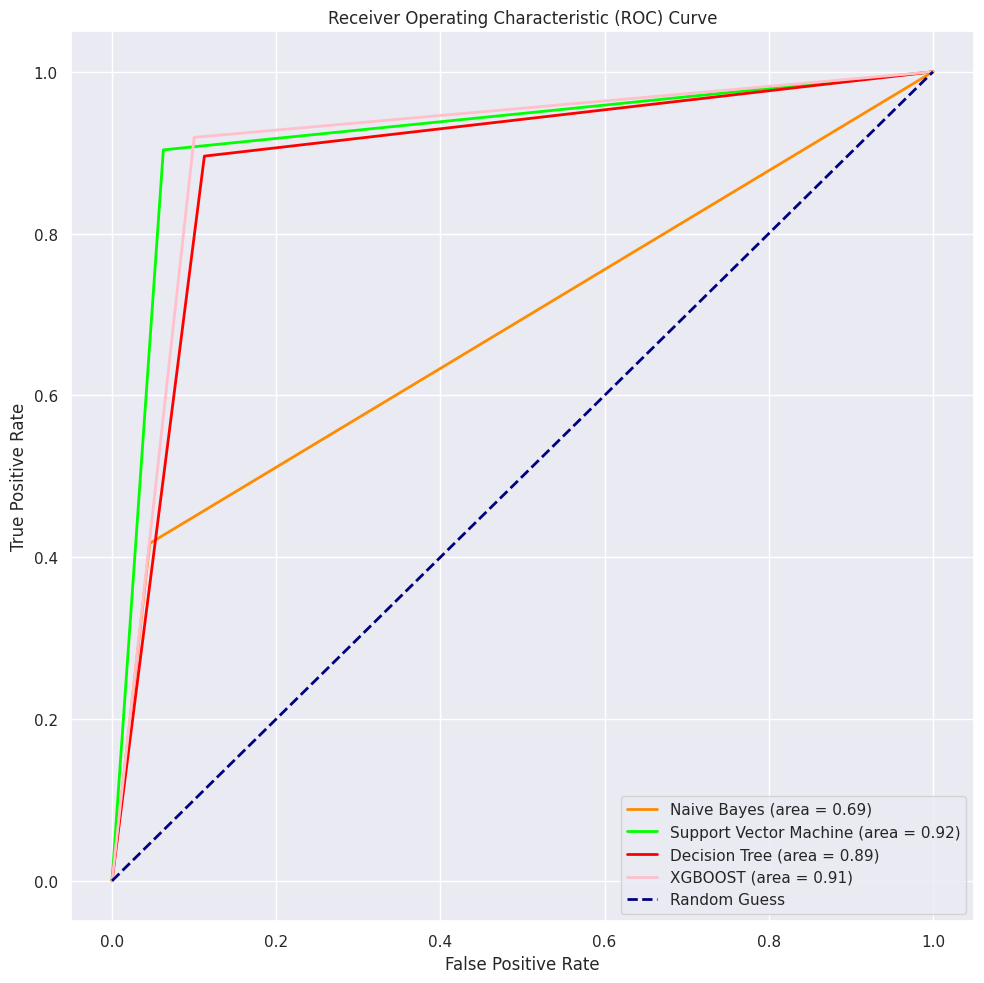

In [ ]:
fpr_nb, tpr_nb, thresholds = roc_curve(b_test, y_pred_nb)
fpr_svm, tpr_svm, thresholds = roc_curve(b_test, y_pred_svm)
fpr_dt, tpr_dt, thresholds = roc_curve(b_test, y_pred_dt)
fpr_xgb, tpr_xgb, thresholds = roc_curve(b_test, y_pred_xgb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure(figsize=(10, 10))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='Naive Bayes (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_svm, tpr_svm, color='lime', lw=2, label='Support Vector Machine (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_xgb, tpr_xgb, color='pink', lw=2, label='XGBOOST (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##Majority Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('rf',grid_search_rf), ('decision-tree',grid_search_dt),('xgboost',grid_search_xg)], voting='hard')
ensemble.fit(A_train, b_train)

ensemble_pred = ensemble.predict(A_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

ensemble_acc = accuracy_score(b_test, ensemble_pred)
ensemble_prec = precision_score(b_test, ensemble_pred)
ensemble_rec = recall_score(b_test, ensemble_pred)
ensemble_f1 = f1_score(b_test, ensemble_pred)

print('Ensemble model accuracy:', ensemble_acc)
print('Ensemble model precision:', ensemble_prec)
print('Ensemble model recall:', ensemble_rec)
print('Ensemble model F1 score:', ensemble_f1)

Ensemble model accuracy: 0.9078156312625251
Ensemble model precision: 0.9018867924528302
Ensemble model recall: 0.9227799227799228
Ensemble model F1 score: 0.9122137404580153


In [ ]:
import joblib

In [ ]:
joblib.dump(ensemble, 'numerical.joblib')

['numerical.joblib']

In [ ]:
A_test

,created_at_month,goal,created_at_hr,state_changed_at_month,backers_count,create_to_launch_days,state_changed_at_hr,launch_to_state_change_days,launched_at_day,launched_at_month,deadline_day,DeadlineWeekend,state_changed_at_day,launch_to_deadline_days,created_at_day,launched_at_hr
2159,9,200000.00,5,10,5,1,13,45,11,9,26,0,26,45,10,13
800,5,20000.00,17,6,217,0,13,30,30,5,29,0,29,30,29,13
1367,8,350.00,21,9,13,0,3,30,30,8,29,0,29,30,29,3
1069,4,3000.00,15,6,54,28,12,40,20,5,29,1,29,40,21,12
2176,11,2800.00,9,12,96,2,11,25,19,11,14,0,14,25,17,11
918,7,5830.00,19,10,7,61,14,30,7,9,7,0,7,30,7,14
1858,5,11500.00,3,7,6,47,19,30,17,6,17,1,17,30,1,19
1780,5,25000.00,5,7,898,28,12,32,29,6,31,1,31,32,31,2
1853,1,100000.00,2,1,0,1,16,3,27,1,25,1,31,28,26,17
392,11,8000.00,0,1,257,83,12,0,23,1,13,0,23,48,1,12
